In [58]:
#let's import stuff
from numpy.random import normal
from scipy.special import softmax
import matplotlib.pyplot as plt
import numpy as np

In [46]:
'''
We need to evaluate exp(value) when taking softmax. But this overflows 
when value is greater than certain value. Let's find out when
would this happen.
At least for my machine this value turns out to be  > 710
So if we take softmax of values greater than this value, it sould be useless
'''
value=709
sm=np.exp(value)

In [64]:
# get softmax with normal distributions with varying mean values
# I had to run this several times till I got no overflows
means_list=[]
max_list=[]
sd_list=[]
x_axis=[]
sm_list=[]
for mean in range(0,40000):
    mean=mean/100
    #print(mean)
    sd=mean/10
    feature=normal(mean,sd,1000)
    #sm=softmax(feature)
    sm=np.exp(feature)/np.sum(np.exp(feature)) 
    sm_list.append(sm)
    means_list.append(sm.mean())
    max_list.append(sm.max())
    sd_list.append(sm.std())
    x_axis.append(mean)
    

Text(0, 0.5, 'mean softmax')

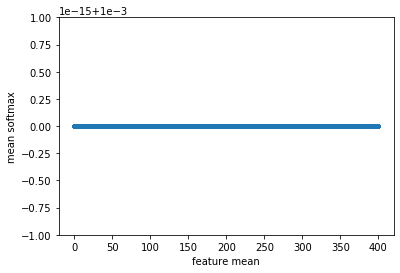

In [4]:
#plot the mean value of the softmax
plt.plot(x_axis,means_list,marker='.',linestyle="None")
plt.xlabel("feature mean")
plt.ylabel('mean softmax')

Text(0, 0.5, 'max softmax')

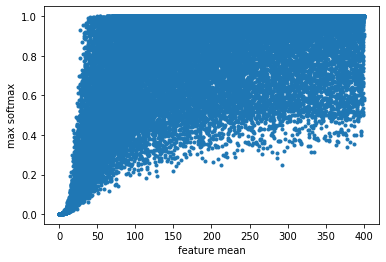

In [5]:
#plot the max value of the softmax
plt.plot(x_axis,max_list,marker='.',linestyle="None")
plt.xlabel("feature mean")
plt.ylabel('max softmax')

Text(0, 0.5, 'std softmax')

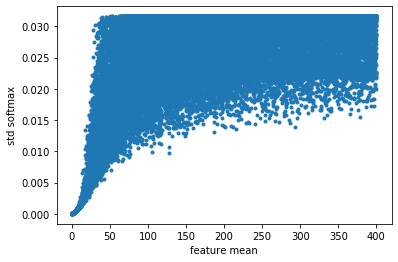

In [13]:
#plot the max value of the softmax
plt.plot(x_axis,sd_list,marker='.',linestyle="None")
plt.xlabel("feature mean")
plt.ylabel('std softmax')

In [ ]:
'''
Softmax tend to be unreliable when the input features are too small 
or when they are too large. 
Let's take a closer look
'''

In [70]:
'''
when inuput values are too small, the different between the softmax values become 
too little to be usefull for anything
'''
feature=np.array([1.0,5.0,6.0,2.0])*1e-8
sm=np.exp(feature)/np.sum(np.exp(feature)) 
print(sm)

[0.24999999 0.25       0.25000001 0.25      ]


In [71]:
'''
when inuput values are too large, only one value of the softmax
becomes very close to 1 and the others are too small
'''
feature=np.array([1.0,5.0,6.0,2.0])*100
sm=np.exp(feature)/np.sum(np.exp(feature)) 
print(sm)

[7.12457641e-218 3.72007598e-044 1.00000000e+000 1.91516960e-174]


In [ ]:
'''
how to deal with this ?
'''

In [72]:
'''
method 1
standsardizing the features before sending them to softmax
'''
# I had to run this several times till I got no overflows
means_list=[]
max_list=[]
sd_list=[]
x_axis=[]
for mean in range(1,40000):
    mean=mean/100
    #print(mean)
    sd=mean/10
    feature=normal(mean,sd,1000)
    #sm=softmax(feature)
    feature=(feature-feature.max())/(feature.max()-feature.min())
    sm=np.exp(feature)/np.sum(np.exp(feature)) 
    means_list.append(sm.mean())
    max_list.append(sm.max())
    sd_list.append(sm.std())
    x_axis.append(mean)
    

'\nLooks like the values are healthier than before\n'

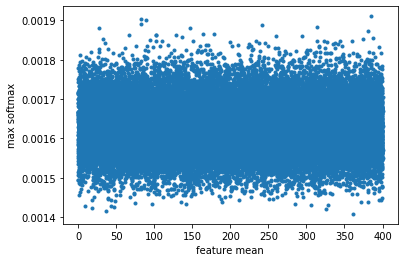

In [73]:
#plot the max value of the softmax
plt.plot(x_axis,max_list,marker='.',linestyle="None")
plt.xlabel("feature mean")
plt.ylabel('max softmax')

'''
Looks like the values are healthier than before
'''

'\nLooks like the values are healthier than before this time too\n'

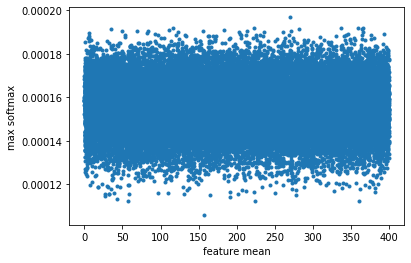

In [74]:
#plot the max value of the softmax
plt.plot(x_axis,sd_list,marker='.',linestyle="None")
plt.xlabel("feature mean")
plt.ylabel('max softmax')

'''
Looks like the values are healthier than before this time too
'''

In [9]:
'''
Method 2
Using log-softmax 
'''
import torch
import torch.nn as nn
m = nn.LogSoftmax()

In [56]:
# I had to run this several times till I got no overflows
means_list=[]
max_list=[]
sd_list=[]
x_axis=[]
feature_list=[]
for mean in range(1,40000):
    mean=mean/100
    #print(mean)
    sd=mean/10
    feature=normal(mean,sd,1000)
    feature_list.append(feature)
    feature=torch.from_numpy(feature)
    lsm=m(feature)
    means_list.append(torch.mean(lsm).item())
    max_list.append(torch.max(lsm).item())
    sd_list.append(torch.std(lsm).item())
    x_axis.append(mean)

/opt/conda/lib/python3.7/site-packages/ipykernel/__main__.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Text(0, 0.5, 'mean softmax')

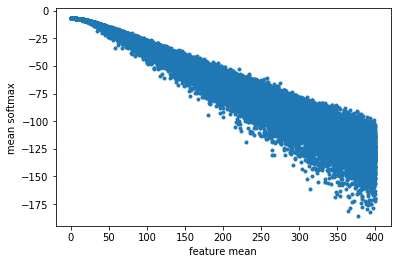

In [55]:
#plot the mean value of the softmax
plt.plot(x_axis,means_list,marker='.',linestyle="None")
plt.xlabel("feature mean")
plt.ylabel('mean softmax')

Text(0, 0.5, 'max softmax')

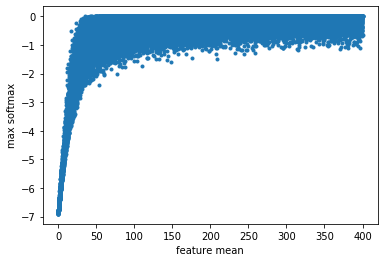

In [52]:
#plot the max value of the softmax
plt.plot(x_axis,max_list,marker='.',linestyle="None")
plt.xlabel("feature mean")
plt.ylabel('max softmax')

Text(0, 0.5, 'std softmax')

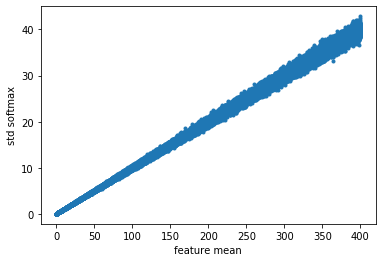

In [53]:
#plot the max value of the softmax
plt.plot(x_axis,sd_list,marker='.',linestyle="None")
plt.xlabel("feature mean")
plt.ylabel('std softmax')